# The Office Final Notebook

![The Office](the_office.jpg)

In [28]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from wrangle import the_office, guest_office, season_episodes, max_views, cluster_df

# Acquire

In [2]:
# getting the office data from wrangle file
df = the_office()
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


### Let's Make a Word Cloud of The Office

(-0.5, 1199.5, 799.5, -0.5)

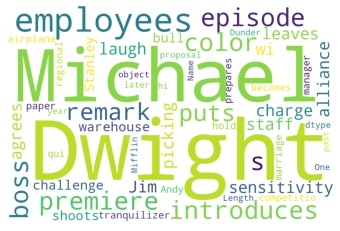

In [11]:
about = df.about
# wordcloud of what each episode is about
img = WordCloud(background_color='white', width=1200, height=800).generate(str(about))
plt.imshow(img)
plt.axis('off')

In [12]:
# getting the guest office data from wrangle file
guest_df = guest_office()
guest_df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,guest_stars,director,writers,color
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,yellow
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur,lightgreen
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak,lightgreen
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein,lightgreen
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta,lightgreen


In [6]:
guest_df.shape

(29, 13)

- It looks like there are 29 episodes with a guest star

In [14]:
# looking at how many seasons and episodes there are
season_episodes()

,season,episodes
0,1,6
1,2,22
2,3,23
3,4,14
4,5,26
5,6,26
6,7,24
7,8,24
8,9,23


### Takeaways
- There are 9 seasons of The Office
- Season 1 was the shortest season with only 6 episodes
- Season 2 through 9 averaged between 22 to 26 episodes with the exeption of season 4 with 14 episodes

# Explore

# Let's see what was the most popular episode

In [15]:
max_views()

episode                                                         77
season                                                           5
episode_title                                        Stress Relief
about            Dwight's too-realistic fire alarm gives Stanle...
ratings                                                        9.7
votes                                                         8170
viewership                                                   22.91
duration                                                        60
date                                               1 February 2009
director                                             Jeffrey Blitz
writers                                           Paul Lieberstein
color                                                    darkgreen
Name: 77, dtype: object

- The most popular episode is 77, season 5 "Stress Relief"

Text(0.5, 1.0, 'Episode Popularity of The Office')

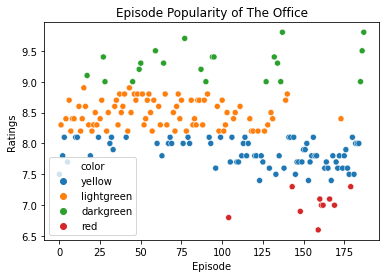

In [29]:
# Scatterplot of popular episodes
sns.scatterplot(df.episode, df.ratings, hue=df.color)
plt.xlabel("Episode")
plt.ylabel("Ratings")
plt.title("Episode Popularity of The Office")

Text(0.5, 1.0, 'Episode Popularity of The Office')

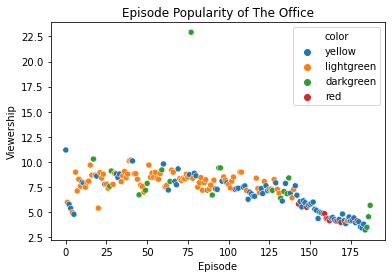

In [30]:
# Scatterplot of popular episodes
sns.scatterplot(df.episode, df.viewership, hue=df.color)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

array([[<AxesSubplot:title={'center':'episode'}>,
        <AxesSubplot:title={'center':'season'}>],
       [<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'viewership'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

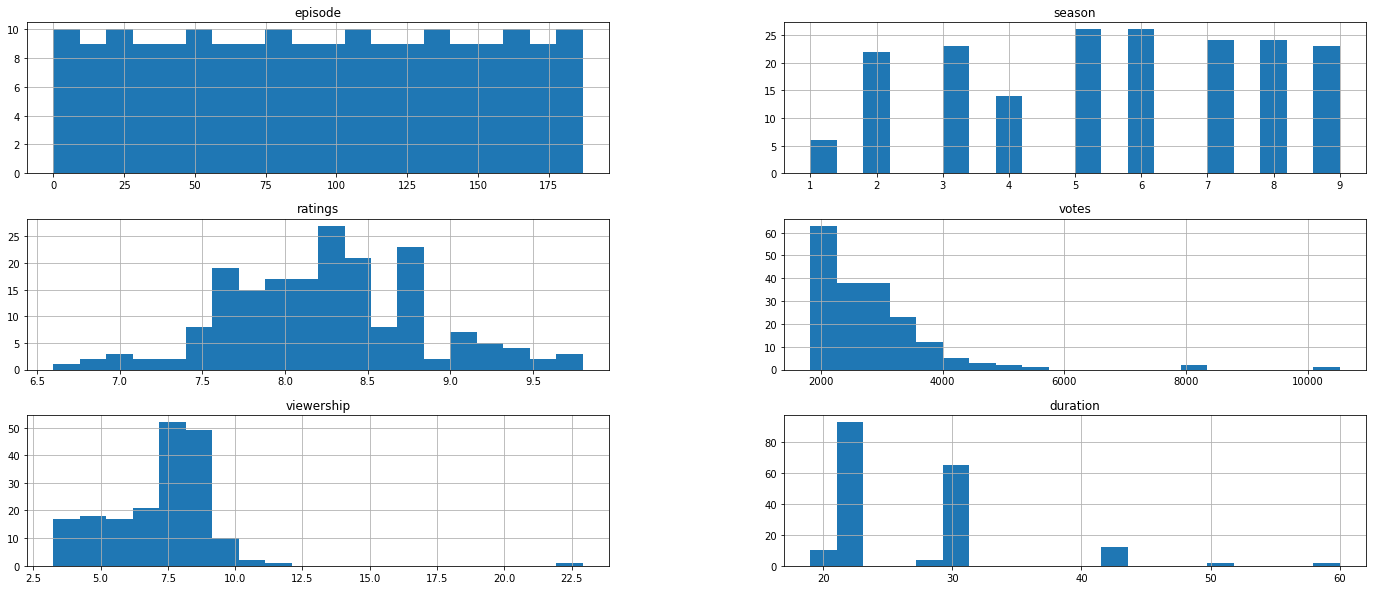

In [25]:
# histogram of the columns in the data
df.hist(figsize=(24, 10), bins=20)